In [30]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
features = [
    "sym_Jet0_pt", "sym_Jet1_pt", "sym_Jet2_pt", "sym_Jet3_pt",
    "sym_Jet0_eta", "sym_Jet1_eta", "sym_Jet2_eta", "sym_Jet3_eta",
    "sym_Jet0_phi", "sym_Jet1_phi", "sym_Jet2_phi", "sym_Jet3_phi",  
    "sym_Jet0_m", "sym_Jet1_m", "sym_Jet2_m", "sym_Jet3_m",
]

In [32]:
import numpy as np
import math
from events_data import EventsData
from dataset import SCDatasetInfo
from scipy.special import loggamma

def plot_sr_stats(events, sr_stats, ax, label, **plot_kwargs):
    assert len(events) == len(sr_stats)

    sr_stats_argsort = np.argsort(sr_stats)[::-1]
    weights = events.weights[sr_stats_argsort]
    is_signal = events.is_signal[sr_stats_argsort]
    is_4b = events.is_4b[sr_stats_argsort]

    ax.plot(
        np.cumsum(weights * is_4b) / np.sum(weights * is_4b),
        np.cumsum(weights * is_signal) / np.sum(weights * is_signal),           
        label=label,
        **plot_kwargs,
    )

def get_is_signal(scdinfo: SCDatasetInfo, signal_filename: str):
    # Now show the answer
    is_signals = []
    for file, file_len in zip(scdinfo.files, scdinfo.get_file_lengths()):
        is_signals.append(
            np.full(file_len, True)
            if file.name == signal_filename
            else np.full(file_len, False)
        )
    is_signal = np.concatenate(is_signals)
    return is_signal



def events_from_scdinfo(scdinfo: SCDatasetInfo, features: list, signal_filename: str) -> EventsData:
    df = scdinfo.fetch_data()
    df["signal"] = get_is_signal(scdinfo, signal_filename)
    events = EventsData.from_dataframe(df, features)

    return events

def hist_events_by_labels(events: EventsData, values: np.ndarray, bins, ax, **hist_kwargs):
    assert len(values) == len(events)   
    ax.hist(values[events.is_3b], 
                        bins=bins, histtype="step", label="3b", 
                        weights=events.weights[events.is_3b], 
                        **hist_kwargs)
    ax.hist(values[events.is_bg4b], 
                bins=bins, histtype="step", label="bg4b", 
                weights=events.weights[events.is_bg4b], 
                **hist_kwargs)
    ax.hist(values[events.is_signal], 
                bins=bins, histtype="step", label="signal", 
                weights=events.weights[events.is_signal], 
                **hist_kwargs)
    
    

def log_likelihood_poisson(k, mu):
    return np.sum(k * np.log(mu) - mu - loggamma(k + 1))

def ll_test_statistic(k, mu):
    return 2 * (log_likelihood_poisson(k, k) - log_likelihood_poisson(k, mu))

In [33]:
import torch
from fvt_classifier import FvTClassifier
from tst_info import TSTInfo
import yaml
import matplotlib.pyplot as plt

config_filename = "configs/counting_test_v2_base.yml"

config = yaml.safe_load(open(config_filename, "r"))
experiment_name = config["experiment_name"]
n_3b = config["n_3b"]
ratio_4b = config["ratio_4b"]

hashes, hparams = TSTInfo.find({
    "experiment_name": experiment_name,
    "n_3b": n_3b,
    "ratio_4b": ratio_4b,
}, return_hparams=True)

seeds = np.unique([hp["seed"] for hp in hparams])
signal_ratios = np.unique([hp["signal_ratio"] for hp in hparams])
n_3bs = np.unique([hp["n_3b"] for hp in hparams])

tst_results = []
result_size = 0

0it [00:00, ?it/s]

1500it [00:06, 232.96it/s]


0it [00:00, ?it/s]

1500it [00:00, 2057.99it/s]


0.5006781


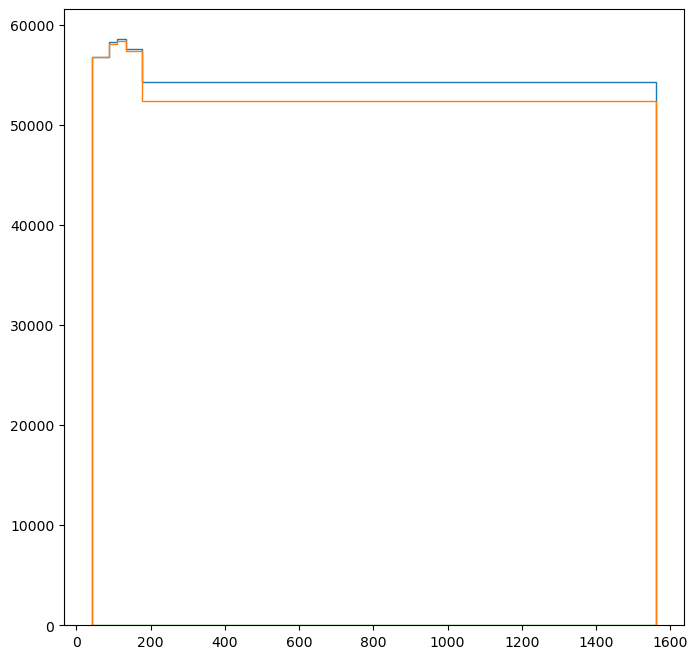

Sigmas:  [ 0.11591703 -0.7913312  -1.1427044  -0.881253   -8.23601   ]
Sigma avg:  3.7564313
Degree of freedom:  5
Rejected:  True
hist_3b:  [56797.25  58317.008 58621.43  57603.188 54242.28 ]
hist_4b:  [56824.88  58126.066 58345.086 57391.875 52341.   ]
bins:  [  42.56563568   86.88589325  108.40015564  134.3866272   176.39721985
 1561.67578125]
LL test statistic:  70.1875


1500it [00:00, 2053.52it/s]


0.5004579


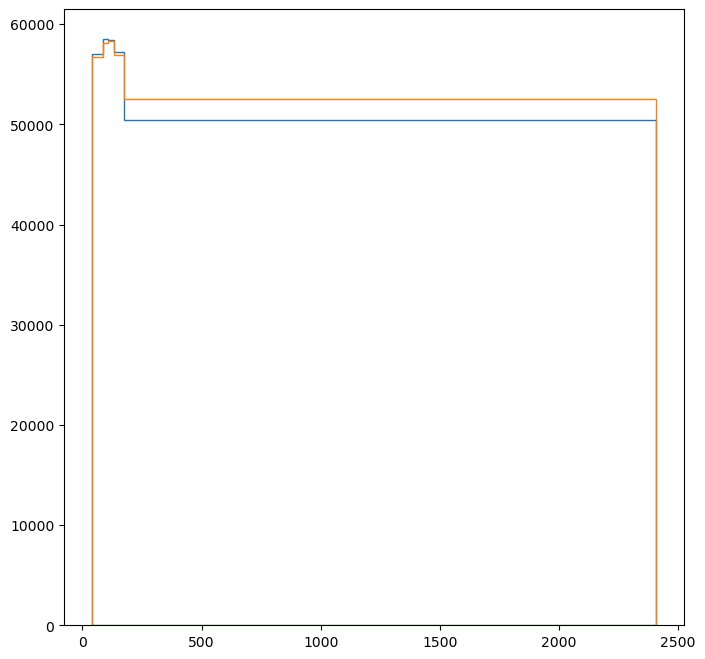

Sigmas:  [-1.1224353 -2.0151849 -0.3365785 -1.0833596  9.662875 ]
Sigma avg:  4.471665
Degree of freedom:  5
Rejected:  True
hist_3b:  [57018.742 58556.4   58415.453 57229.28  50384.156]
hist_4b:  [56751.035 58069.77  58334.133 56970.406 52576.594]
bins:  [  41.34327316   86.75609283  108.28029633  134.13724976  176.08382263
 2406.51489258]
LL test statistic:  100.625


1500it [00:00, 2049.28it/s]


0.49922106


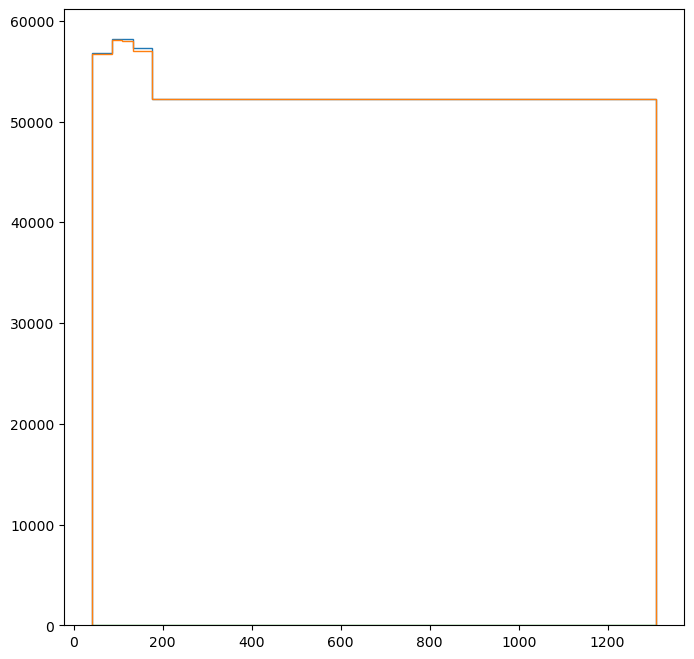

Sigmas:  [-0.4085965  -0.59931666 -0.8355318  -1.060725   -0.08154466]
Sigma avg:  0.68644476
Degree of freedom:  5
Rejected:  False
hist_3b:  [56820.32  58227.297 58202.055 57277.016 52264.562]
hist_4b:  [56722.965 58082.77  58000.656 57023.438 52245.92 ]
bins:  [  41.63728333   86.90542145  108.3622345   134.22121277  176.23232422
 1308.41516113]
LL test statistic:  2.375


1500it [00:00, 2045.67it/s]


0.5002555


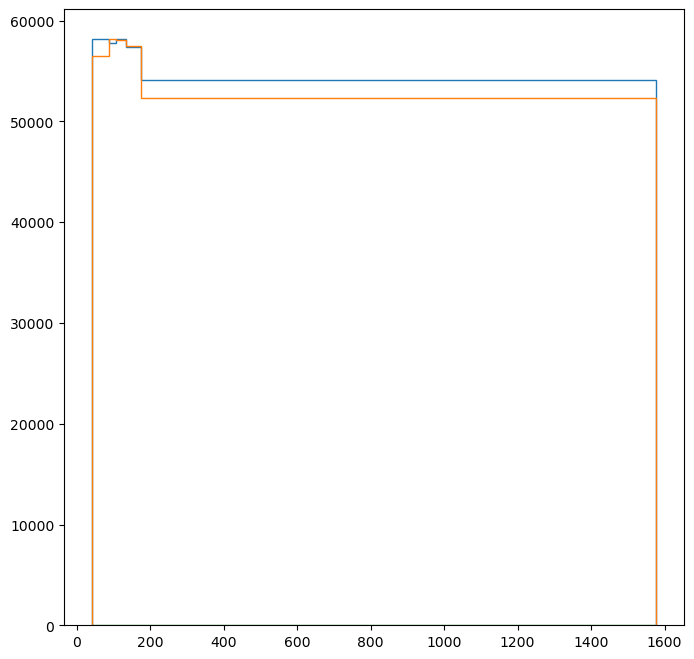

Sigmas:  [-7.2421765   1.9245162  -0.62038094  0.61221063 -7.680572  ]
Sigma avg:  4.814639
Degree of freedom:  5
Rejected:  True
hist_3b:  [58211.797 57752.516 58219.484 57385.156 54062.92 ]
hist_4b:  [56477.53  58215.938 58069.89  57531.906 52291.766]
bins:  [  42.65632629   86.79649048  108.28009186  134.13057861  176.14173584
 1576.20703125]
LL test statistic:  115.375


1500it [00:00, 2039.69it/s]


0.50001717


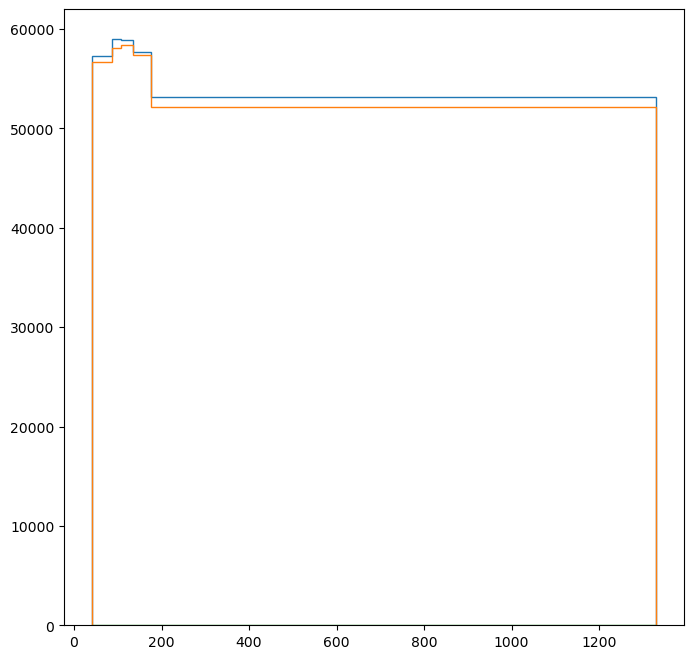

Sigmas:  [-2.6804984 -4.0944524 -2.106182  -1.2854382 -4.241591 ]
Sigma avg:  3.0993245
Degree of freedom:  5
Rejected:  True
hist_3b:  [57302.66  59032.3   58901.46  57693.906 53117.08 ]
hist_4b:  [56662.797 58041.67  58391.406 57385.562 52144.   ]
bins:  [  41.72281647   86.79923096  108.30102844  134.31050415  176.2807312
 1330.03686523]
LL test statistic:  48.125


1500it [00:00, 2048.94it/s]


0.49985784


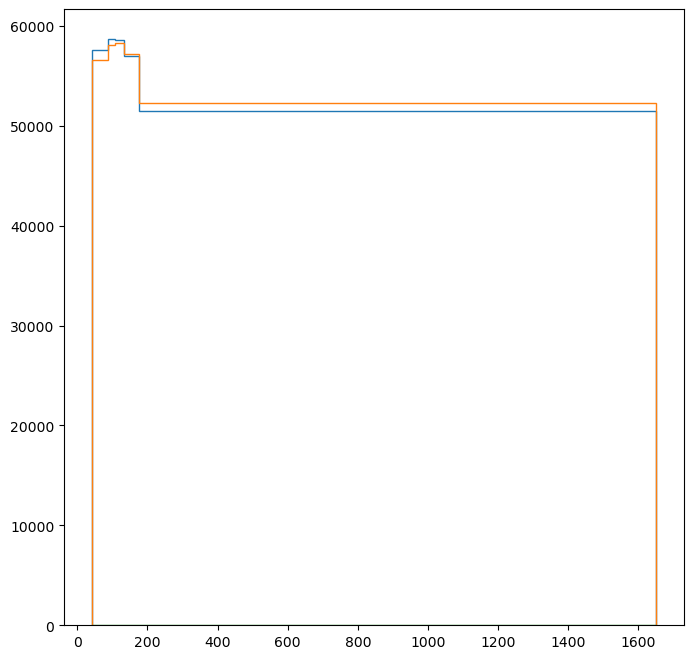

Sigmas:  [-4.216919   -2.5286012  -1.4435465   0.63438475  3.3312595 ]
Sigma avg:  2.7480826
Degree of freedom:  5
Rejected:  True
hist_3b:  [57608.92  58726.188 58630.375 57015.203 51485.53 ]
hist_4b:  [56601.22  58115.016 58281.36  57166.78  52244.188]
bins:  [  42.65632629   86.79388885  108.27996368  134.07049561  176.08128662
 1649.95471191]
LL test statistic:  37.6875


1500it [00:00, 2050.55it/s]


0.4997403


KeyboardInterrupt: 

In [24]:
from training_info import TrainingInfoV2
from plots import calibration_plot
from scipy import stats

nbins = 5
verbose = False
show_plots = False
seeds = np.arange(0, 10)
w_4b_cut = 0.1

for seed in seeds:
    hparam_filter = {
        "experiment_name": experiment_name,
        "seed": seed,
    }
    hashes = TSTInfo.find(hparam_filter)
    tstinfo_hash = hashes[0]
    tstinfo = TSTInfo.load(tstinfo_hash)
    signal_filename = tstinfo.hparams["signal_filename"]
    seed = tstinfo.hparams["seed"]
    signal_ratio = tstinfo.hparams["signal_ratio"]


    scdinfo_tst = tstinfo.scdinfo_tst
    events_tst = events_from_scdinfo(scdinfo_tst, features, signal_filename)
    base_fvt_hash = tstinfo.base_fvt_tinfo_hash
    tinfo = TrainingInfoV2.load(base_fvt_hash)
    df_train, df_val = tinfo.fetch_train_val_data()
    df_train["signal"] = False
    df_val["signal"] = False
    events_train = EventsData.from_dataframe(df_train, features)
    events_val = EventsData.from_dataframe(df_val, features)
    
    fvt_model = FvTClassifier.load_from_checkpoint(f"./checkpoints/{base_fvt_hash}_best.ckpt")
    fvt_model.eval()

    ratio_4b_val = events_val.total_weight_4b / events_val.total_weight
    print(ratio_4b_val)
    probs_4b_est = fvt_model.predict(events_val.X_torch).detach().cpu().numpy()[:, 1]
    events_val.reweight(np.where(events_val.is_4b, 
                                 events_val.weights, 
                                 events_val.weights * probs_4b_est * ratio_4b / ((1 - probs_4b_est) * (1 - ratio_4b_val))))
    # hist_values = events_val.X[:, 0]
    hist_values = probs_4b_est
    
    # get quantiles of hist_values
    bins = np.quantile(hist_values, np.linspace(0, 1, nbins + 1))

    hist_4b, _ = np.histogram(hist_values[events_val.is_4b], bins=bins, weights=events_val.weights[events_val.is_4b])
    hist_3b, _ = np.histogram(hist_values[events_val.is_3b], bins=bins, weights=events_val.weights[events_val.is_3b])

    min_n_samples = 10
    test_idx = (hist_4b > min_n_samples) & (hist_3b > min_n_samples)

    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    hist_events_by_labels(events_val, hist_values, bins=bins, ax=ax)
    plt.show()

    sigma = (hist_4b - hist_3b) / np.sqrt((hist_4b + hist_3b) / 2)
    sigma = sigma[test_idx]
    sigma_avg = np.sqrt(np.mean(sigma**2))
    df = np.sum(test_idx) 

    print("Sigmas: ", sigma)
    print("Sigma avg: ", sigma_avg)
    print("Degree of freedom: ", df)
    print("Rejected: ", df * sigma_avg**2 > stats.chi2.ppf(0.95, df))

    print("hist_3b: ", hist_3b)
    print("hist_4b: ", hist_4b)
    print("bins: ", bins)

    print("LL test statistic: ", ll_test_statistic(hist_4b[test_idx], hist_3b[test_idx]))


0it [00:00, ?it/s]

1500it [00:00, 2080.03it/s]


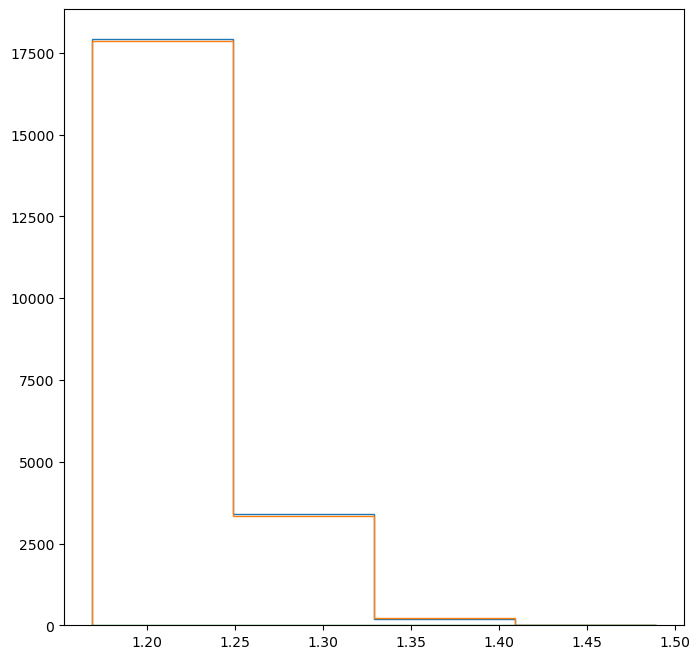

Sigmas:  [-0.57524836 -1.221558    1.6255687 ]
Sigma avg:  1.220053
Degree of freedom:  3
Rejected:  False
hist_3b:  [1.7937529e+04 3.4049492e+03 2.0161914e+02 6.8574219e+00]
hist_4b:  [1.7860568e+04 3.3340410e+03 2.2537109e+02 1.3369141e+01]
bins:  [1.16916835 1.2491245  1.32908064 1.40903679 1.48899293]
LL test statistic:  4.5576171875


1500it [00:00, 2047.80it/s]


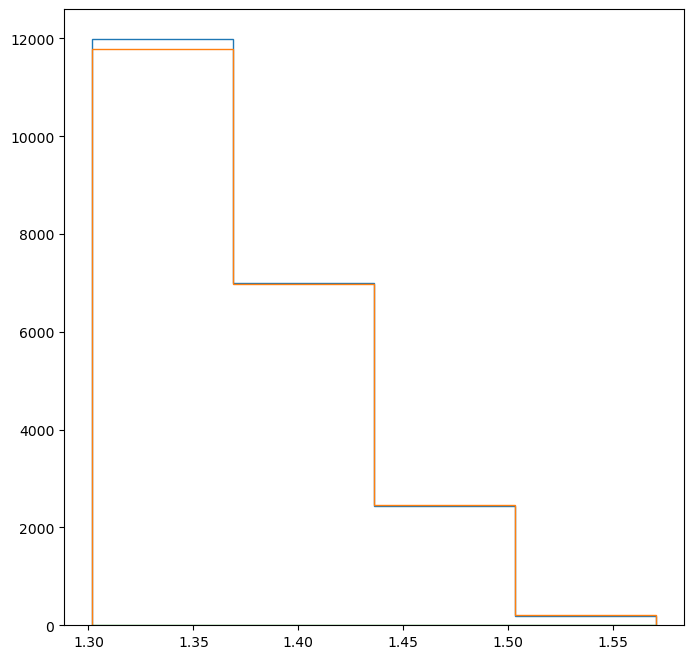

Sigmas:  [-1.9334606  -0.16735366  0.08119883  2.0542881 ]
Sigma avg:  1.4135921
Degree of freedom:  4
Rejected:  False
hist_3b:  [11997.53     6995.425    2448.4707    181.48828]
hist_4b:  [11786.685    6981.4346   2452.4902    210.23828]
bins:  [1.3018018  1.36892539 1.43604898 1.50317258 1.57029617]
LL test statistic:  8.073486328125


1500it [00:00, 2074.73it/s]


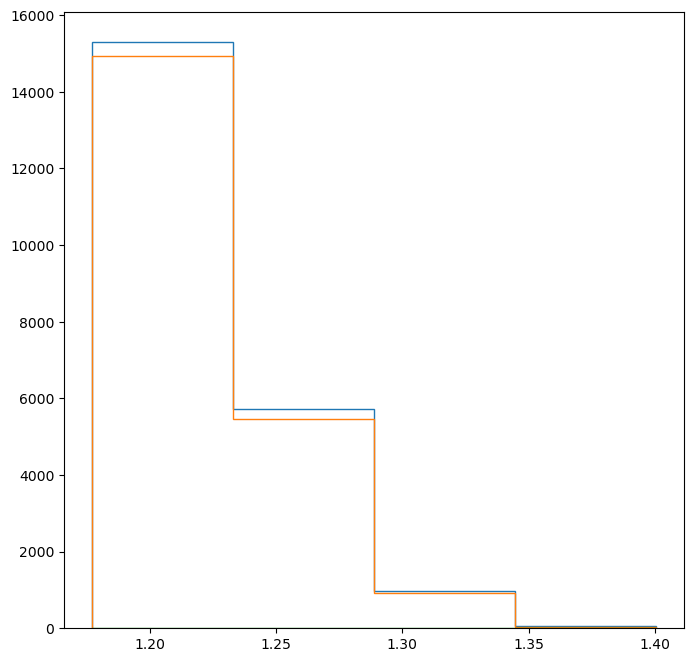

Sigmas:  [-3.049252  -3.5716195 -1.0763725 -1.7982798]
Sigma avg:  2.5713222
Degree of freedom:  4
Rejected:  True
hist_3b:  [15309.366    5729.616     966.46094    56.10547]
hist_4b:  [14934.396    5462.4355    933.2871     43.41992]
bins:  [1.1772511  1.23304728 1.28884345 1.34463963 1.40043581]
LL test statistic:  26.201629638671875


1500it [00:00, 2037.57it/s]


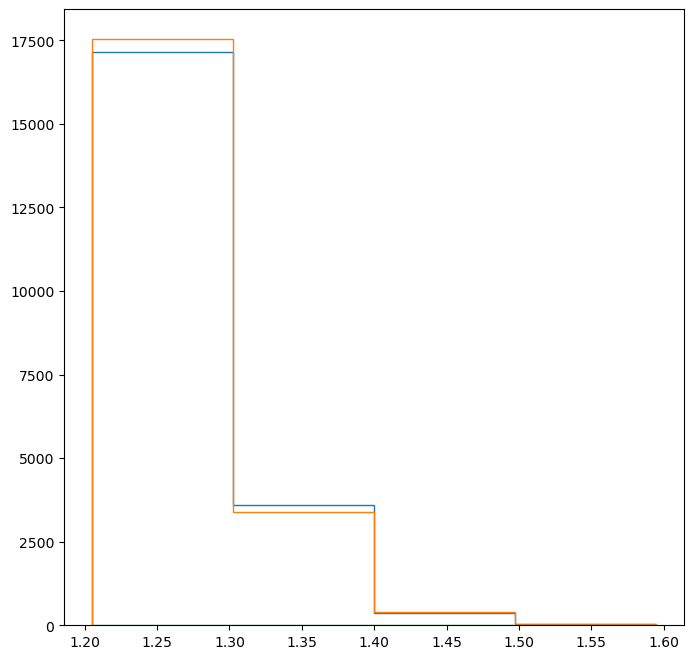

Sigmas:  [ 2.9756668  -3.4137468   0.5732199  -0.15080237]
Sigma avg:  2.2836144
Degree of freedom:  4
Rejected:  True
hist_3b:  [17159.707     3605.1348     380.8828      25.894531]
hist_4b:  [17551.725     3403.0566     392.15234     25.132812]
bins:  [1.20518529 1.30255792 1.39993054 1.49730316 1.59467578]
LL test statistic:  20.775070190429688


1500it [00:00, 2052.58it/s]


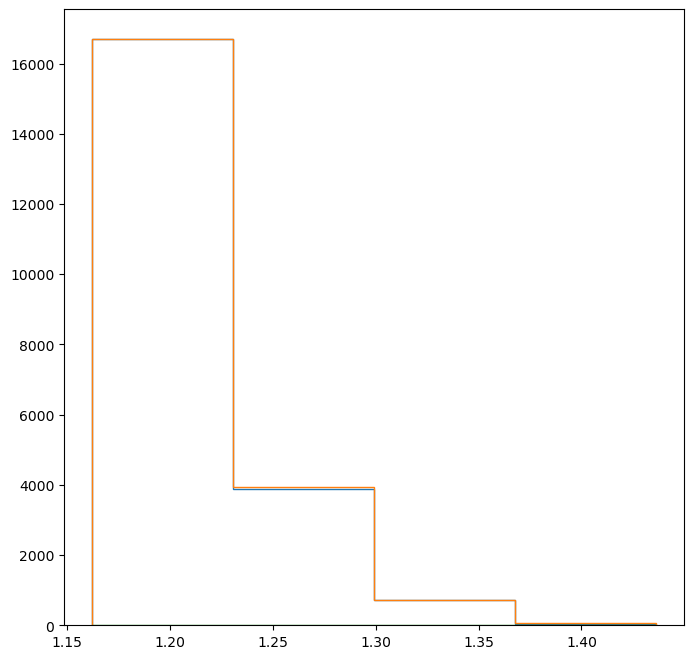

Sigmas:  [-0.05788686  1.1020573   0.38809693  2.3632483 ]
Sigma avg:  1.3184692
Degree of freedom:  4
Rejected:  False
hist_3b:  [16711.738     3869.2012     718.88086     46.808594]
hist_4b:  [16704.256    3938.0566    729.3242     64.43359]
bins:  [1.16223121 1.23071876 1.29920632 1.36769387 1.43618143]
LL test statistic:  7.328338623046875


1500it [00:00, 2054.09it/s]


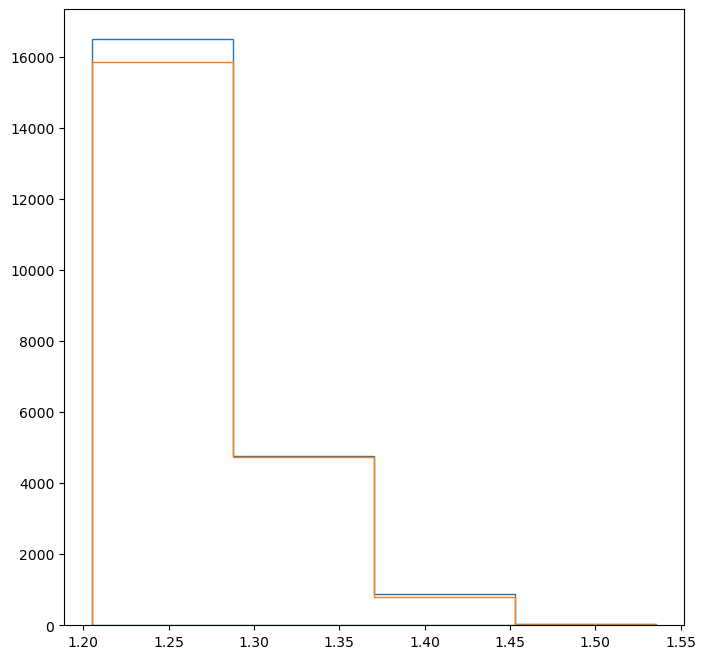

Sigmas:  [-5.1756086 -0.4467431 -2.953544  -1.1013986]
Sigma avg:  3.0382152
Degree of freedom:  4
Rejected:  True
hist_3b:  [16513.785    4757.371     893.51953    49.69336]
hist_4b:  [15855.352     4726.6074     807.3867      42.226562]
bins:  [1.20519936 1.28778067 1.37036198 1.4529433  1.53552461]
LL test statistic:  36.539215087890625


1500it [00:00, 2066.45it/s]


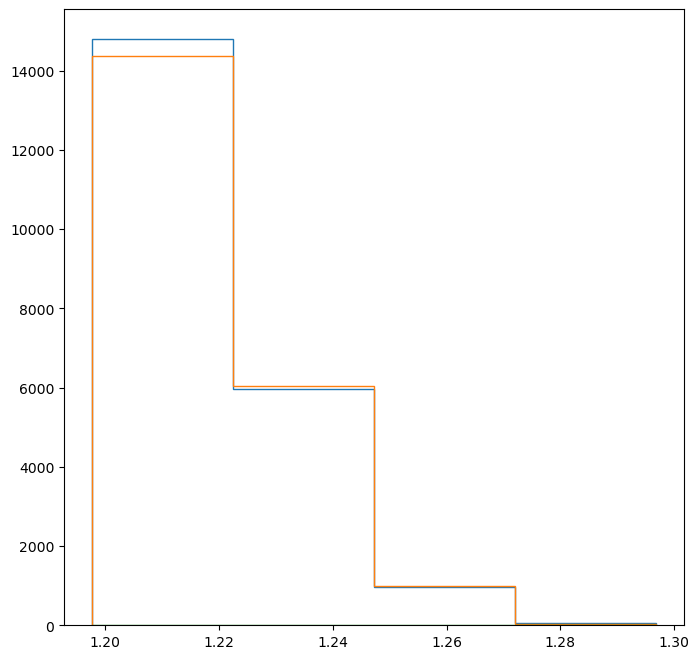

Sigmas:  [-3.7320542   0.86967087  0.2280803  -0.22310768]
Sigma avg:  1.9226514
Degree of freedom:  4
Rejected:  True
hist_3b:  [14807.921     5966.29       972.3125      45.242188]
hist_4b:  [14357.244     6033.6543     979.4375      43.753906]
bins:  [1.19769907 1.22247896 1.24725884 1.27203873 1.29681861]
LL test statistic:  14.719390869140625


1500it [00:00, 2064.50it/s]


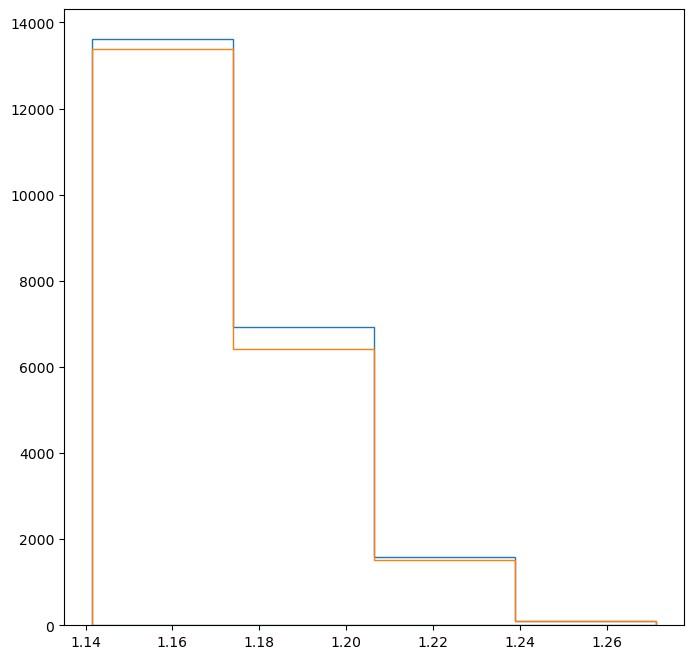

Sigmas:  [-2.1595285  -6.4713645  -1.6130455  -0.44135296]
Sigma avg:  3.5120804
Degree of freedom:  4
Rejected:  True
hist_3b:  [13623.295    6936.8438   1589.1875    109.23828]
hist_4b:  [13372.4      6408.2266   1525.5312    104.67383]
bins:  [1.14155579 1.17399371 1.20643163 1.23886955 1.27130747]
LL test statistic:  48.7384033203125


1500it [00:00, 2021.29it/s]


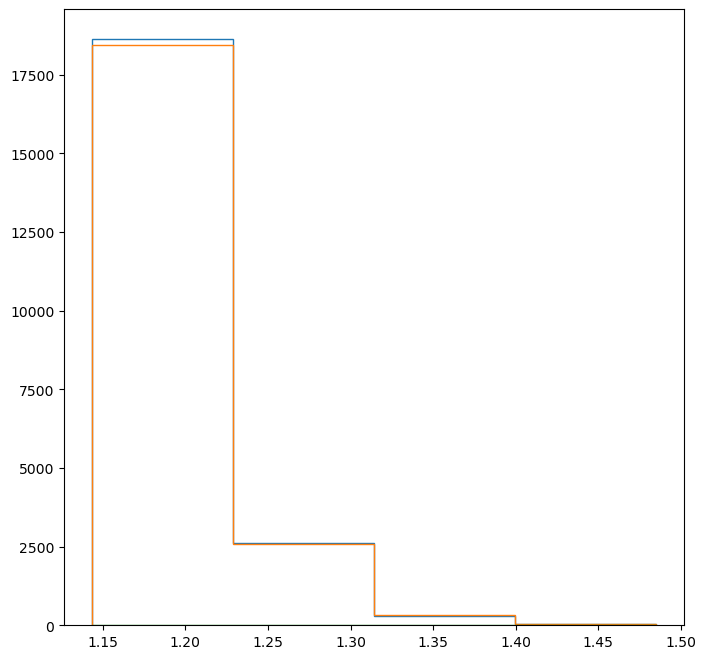

Sigmas:  [-1.503523   -0.34484446  1.3360109  -1.0752034 ]
Sigma avg:  1.153309
Degree of freedom:  4
Rejected:  False
hist_3b:  [18652.377     2602.5195     290.22656     32.316406]
hist_4b:  [18447.6       2584.957      313.4375      26.486328]
bins:  [1.14362419 1.22894937 1.31427455 1.39959973 1.48492491]
LL test statistic:  5.3287200927734375


1500it [00:00, 2059.49it/s]


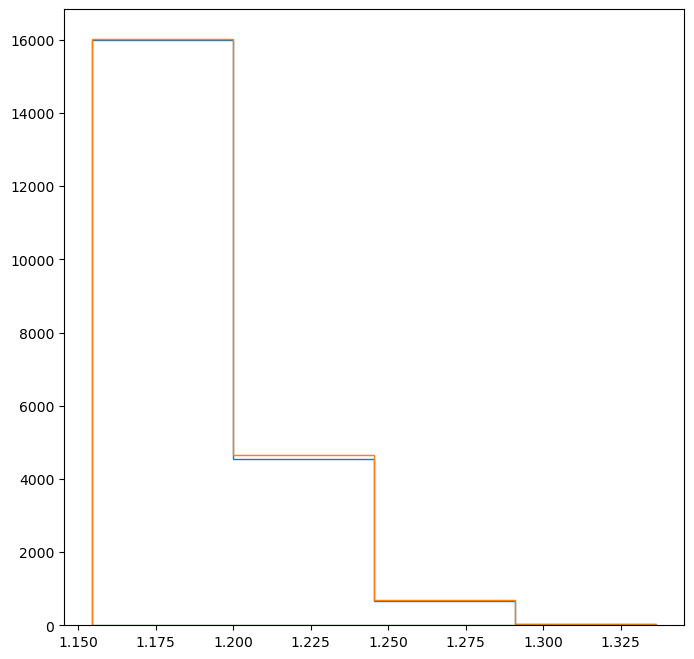

Sigmas:  [0.24108414 1.416105   1.2704715  0.04111722]
Sigma avg:  0.9590703
Degree of freedom:  4
Rejected:  False
hist_3b:  [16004.344    4547.1406    659.28516    47.29883]
hist_4b:  [16034.857    4643.135     692.3125     47.58203]
bins:  [1.15448928 1.19994351 1.24539775 1.29085198 1.33630621]
LL test statistic:  3.699920654296875


In [34]:
from training_info import TrainingInfoV2
from plots import calibration_plot
from scipy import stats

nbins = 5
verbose = False
show_plots = False
seeds = np.arange(0, 10)
w_4b_cut = 0.1

for seed in seeds:
    hparam_filter = {
        "experiment_name": experiment_name,
        "seed": seed,
    }
    hashes = TSTInfo.find(hparam_filter)
    tstinfo_hash = hashes[0]
    tstinfo = TSTInfo.load(tstinfo_hash)
    signal_filename = tstinfo.hparams["signal_filename"]
    seed = tstinfo.hparams["seed"]
    signal_ratio = tstinfo.hparams["signal_ratio"]

    scdinfo_tst = tstinfo.scdinfo_tst
    events_tst = events_from_scdinfo(scdinfo_tst, features, signal_filename)
    base_fvt_hash = tstinfo.base_fvt_tinfo_hash
    
    fvt_model = FvTClassifier.load_from_checkpoint(f"./checkpoints/{base_fvt_hash}_best.ckpt")
    fvt_model.eval()

    SR_stats = tstinfo.SR_stats
    SR_stats_argsort = np.argsort(SR_stats)[::-1]
    until = np.argmin(np.cumsum((events_tst.is_4b * events_tst.weights)[SR_stats_argsort]) / events_tst.total_weight_4b < w_4b_cut)
    events_SR = events_tst[SR_stats_argsort[:until]]

    probs_4b_est_SR = fvt_model.predict(events_SR.X_torch).detach().numpy()[:, 1]
    events_SR.reweight(np.where(events_SR.is_4b, events_SR.weights, events_SR.weights * probs_4b_est_SR / (1 - probs_4b_est_SR)))
    # hist_values_SR = probs_4b_est_SR
    hist_values_SR = SR_stats[SR_stats_argsort[:until]]
    # hist_values_SR = np.random.rand(len(events_SR))
    
    bins = np.linspace(np.min(hist_values_SR), np.max(hist_values_SR), nbins)

    # get quantiles of hist_values_SR
    # bins = np.quantile(hist_values_SR, np.linspace(0, 1, nbins + 1))

    hist_4b, _ = np.histogram(hist_values_SR[events_SR.is_4b], bins=bins, weights=events_SR.weights[events_SR.is_4b])
    hist_3b, _ = np.histogram(hist_values_SR[events_SR.is_3b], bins=bins, weights=events_SR.weights[events_SR.is_3b])

    min_n_samples = 10
    test_idx = (hist_4b > min_n_samples) & (hist_3b > min_n_samples)

    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    hist_events_by_labels(events_SR, hist_values_SR, bins=bins, ax=ax)
    plt.show()

    sigma = (hist_4b - hist_3b) / np.sqrt((hist_4b + hist_3b) / 2)
    sigma = sigma[test_idx]
    sigma_avg = np.sqrt(np.mean(sigma**2))
    df = np.sum(test_idx) 

    print("Sigmas: ", sigma)
    print("Sigma avg: ", sigma_avg)
    print("Degree of freedom: ", df)
    print("Rejected: ", df * sigma_avg**2 > stats.chi2.ppf(0.95, df))

    print("hist_3b: ", hist_3b)
    print("hist_4b: ", hist_4b)
    print("bins: ", bins)

    print("LL test statistic: ", ll_test_statistic(hist_4b[test_idx], hist_3b[test_idx]))


0it [00:00, ?it/s]

1502it [00:00, 2022.59it/s]


Seed:  0


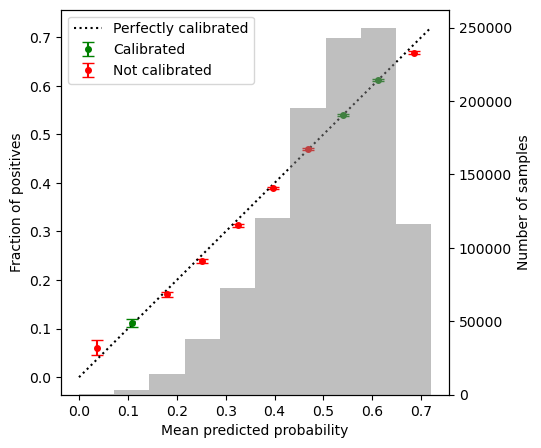

1502it [00:00, 2072.48it/s]


Seed:  1


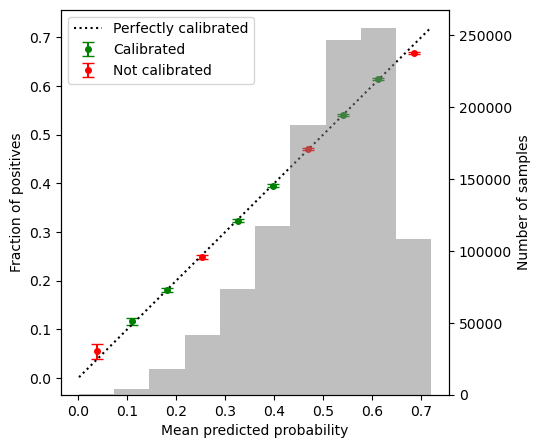

1502it [00:00, 2057.37it/s]


Seed:  2


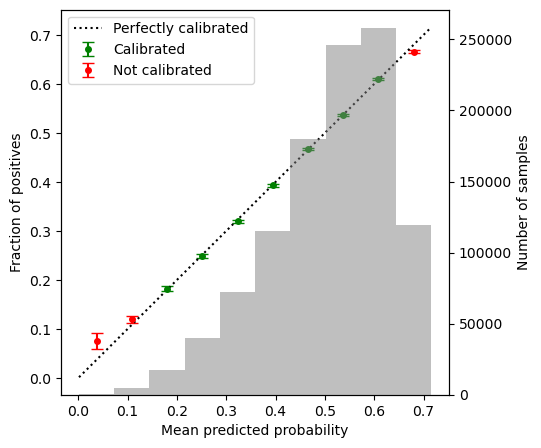

1502it [00:00, 2048.91it/s]


Seed:  3


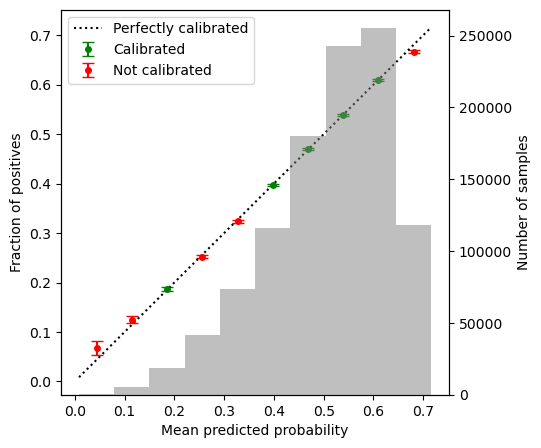

1502it [00:00, 2055.56it/s]


Seed:  4


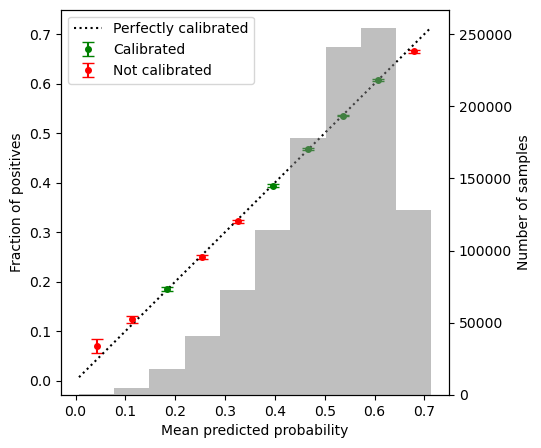

1502it [00:00, 2057.83it/s]


Seed:  5


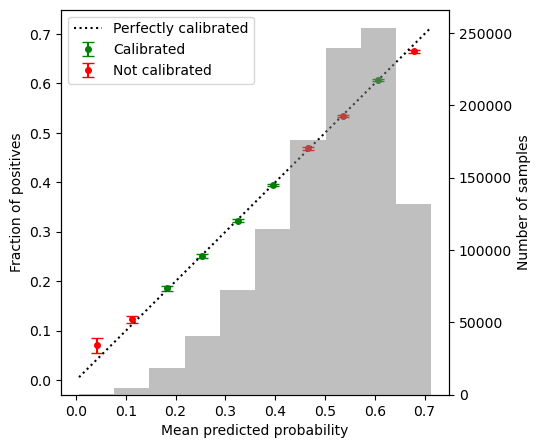

1502it [00:00, 2056.42it/s]


Seed:  6


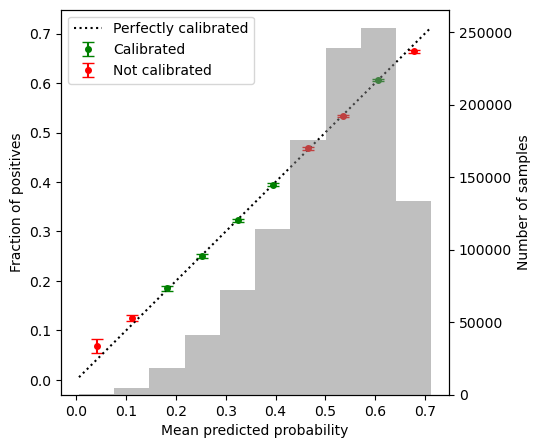

1502it [00:00, 2072.92it/s]


Seed:  7


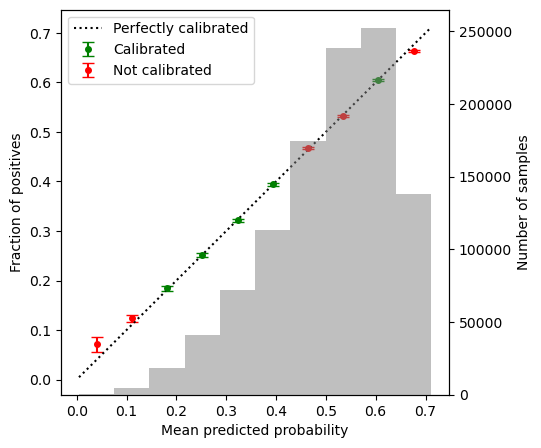

1502it [00:00, 2062.75it/s]


Seed:  8


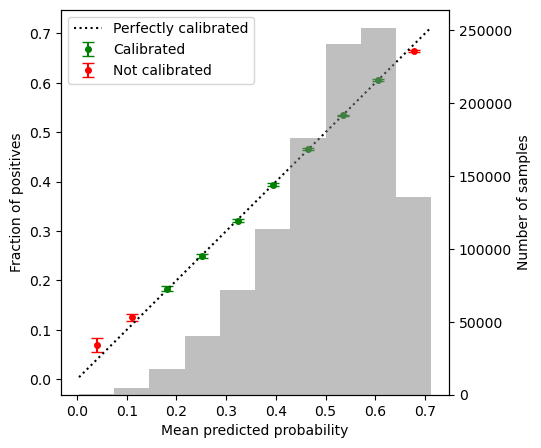

1502it [00:00, 2059.52it/s]


Seed:  9


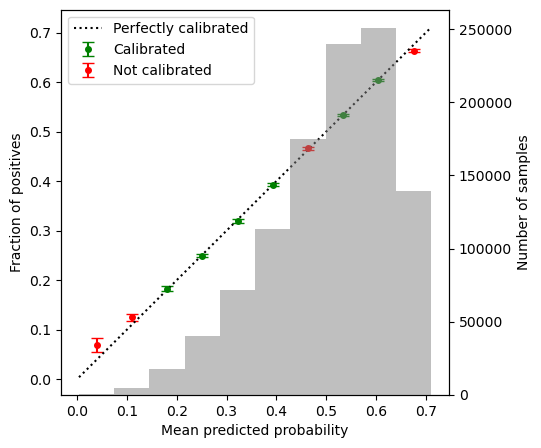

In [31]:
from training_info import TrainingInfoV2
from plots import calibration_plot
from scipy import stats

nbins = 10
verbose = False
show_plots = False
seeds = np.arange(0, 10)

for seed in seeds:
    hparam_filter = {
        "experiment_name": experiment_name,
        "seed": seed,
    }
    hashes = TSTInfo.find(hparam_filter)
    tstinfo_hash = hashes[0]
    tstinfo = TSTInfo.load(tstinfo_hash)
    signal_filename = tstinfo.hparams["signal_filename"]
    seed = tstinfo.hparams["seed"]
    signal_ratio = tstinfo.hparams["signal_ratio"]


    scdinfo_tst = tstinfo.scdinfo_tst
    events_tst = events_from_scdinfo(scdinfo_tst, features, signal_filename)
    base_fvt_hash = tstinfo.base_fvt_tinfo_hash
    
    tinfo_v2 = TrainingInfoV2.load(base_fvt_hash)
    train_df, val_df = tinfo_v2.fetch_train_val_data()
    train_df["signal"] = False
    val_df["signal"] = False

    events_train = EventsData.from_dataframe(train_df, features)
    
    if seed == 0:
        events_fixed = events_train.clone()
        probs_4b_est_fixed_list = []


    
    fvt_model = FvTClassifier.load_from_checkpoint(f"./checkpoints/{base_fvt_hash}_best.ckpt")
    fvt_model.eval()

    events_tst = events_train

    probs_4b_est = fvt_model.predict(events_tst.X_torch).detach().numpy()[:, 1]
    calibration_plot(probs_4b_est, events_tst.is_4b, sample_weights=events_tst.weights, bins=nbins)
    events_tst.reweight(np.where(events_tst.is_4b, events_tst.weights, events_tst.weights * probs_4b_est / (1 - probs_4b_est)))

    # w_4b_ratio = events_tst.total_weight_4b / events_tst.total_weight
    # events_tst.reweight(np.where(events_tst.is_4b, events_tst.weights, events_tst.weights * w_4b_ratio / (1 - w_4b_ratio)))

    print(events_tst.total_weight_4b / events_tst.total_weight)

    # hist_values = np.log(probs_4b_est / (1 - probs_4b_est))
    # hist_values = np.mean(events_tst.X[:, [0, 4, 8, 12]], axis=1)
    hist_values = probs_4b_est

    bins = np.linspace(np.min(hist_values), np.max(hist_values), nbins)
    hist_4b, _ = np.histogram(hist_values[events_tst.is_4b], bins=bins, weights=events_tst.weights[events_tst.is_4b])
    hist_3b, _ = np.histogram(hist_values[events_tst.is_3b], bins=bins, weights=events_tst.weights[events_tst.is_3b])

    min_n_samples = 100
    test_idx = (hist_4b > min_n_samples) & (hist_3b > min_n_samples)

    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    hist_events_by_labels(events_tst, hist_values, bins=bins, ax=ax)
    plt.show()

    sigma = (hist_4b - hist_3b) / np.sqrt((hist_4b + hist_3b) / 2)
    sigma = sigma[test_idx]
    sigma_avg = np.sqrt(np.mean(sigma**2))
    df = np.sum(test_idx) 

    print("Sigmas: ", sigma)
    print("Sigma avg: ", sigma_avg)
    print("Degree of freedom: ", df)
    print("Rejected: ", df * sigma_avg**2 > stats.chi2.ppf(0.95, df))

    print("hist_3b: ", hist_3b)
    print("hist_4b: ", hist_4b)
    print("bins: ", bins)

    print("LL test statistic: ", ll_test_statistic(hist_4b[test_idx], hist_3b[test_idx]))


In [32]:
seed = 0
hparam_filter = {
    "experiment_name": experiment_name,
    "seed": seed,
}
hashes = TSTInfo.find(hparam_filter)
tstinfo_hash = hashes[0]
tstinfo = TSTInfo.load(tstinfo_hash)
signal_filename = tstinfo.hparams["signal_filename"]
seed = tstinfo.hparams["seed"]
signal_ratio = tstinfo.hparams["signal_ratio"]

scdinfo_tst = tstinfo.scdinfo_tst
events_tst = events_from_scdinfo(scdinfo_tst, features, signal_filename)
base_fvt_hash = tstinfo.base_fvt_tinfo_hash

tinfo_v2 = TrainingInfoV2.load(base_fvt_hash)
train_df, val_df = tinfo_v2.fetch_train_val_data()
train_df["signal"] = False
val_df["signal"] = False

events_train = EventsData.from_dataframe(train_df, features) # any events will do
events_test = EventsData.from_dataframe(val_df, features)

fvt_models = []
for seed in (seeds := np.arange(0, 20)):
    hparam_filter = {
        "experiment_name": experiment_name,
        "seed": seed,
    }
    hashes = TSTInfo.find(hparam_filter)
    tstinfo_hash = hashes[0]
    tstinfo = TSTInfo.load(tstinfo_hash)
    base_fvt_hash = tstinfo.base_fvt_tinfo_hash
    fvt_model = FvTClassifier.load_from_checkpoint(f"./checkpoints/{base_fvt_hash}_best.ckpt")
    fvt_model.eval()
    fvt_models.append(fvt_model)


probs_4b_est_train = [fvt_model.predict(events_train.X_torch).detach().numpy()[:, 1] for fvt_model in fvt_models]


1502it [00:02, 629.72it/s]
1502it [00:00, 2053.46it/s]
1502it [00:00, 2041.70it/s]
1502it [00:00, 2058.95it/s]
1502it [00:00, 2050.44it/s]
1502it [00:00, 2060.34it/s]
1502it [00:00, 2053.37it/s]
1502it [00:00, 2064.85it/s]
1502it [00:00, 2064.85it/s]
1502it [00:00, 2064.48it/s]
1502it [00:00, 2054.16it/s]
1502it [00:00, 2070.38it/s]
1502it [00:00, 2043.91it/s]
1502it [00:00, 2047.96it/s]
1502it [00:00, 2052.92it/s]
1502it [00:00, 2070.88it/s]
1502it [00:00, 2060.72it/s]
1502it [00:00, 2035.61it/s]
1502it [00:00, 2040.54it/s]
1502it [00:00, 2083.03it/s]
1502it [00:00, 2074.76it/s]


In [52]:
# find the weights that minimize loss
def loss(weights, probs_4b_est_list, events):
    probs_4b_est = np.average(probs_4b_est_list, axis=0, weights=weights)
    return -np.mean(np.log(probs_4b_est) * events.is_4b + np.log(1 - probs_4b_est) * events.is_3b)

def gradient(weights, probs_4b_est_list, events):
    probs_4b_est = np.average(probs_4b_est_list, axis=0, weights=weights)
    return -np.mean(events.is_4b / probs_4b_est - events.is_3b / (1 - probs_4b_est)) * np.sum(np.stack(probs_4b_est_list, axis=1), axis=0)

In [54]:
weights = np.ones(len(probs_4b_est_train)) / len(probs_4b_est_train)
# gradient descent with learning rate 0.1
lr = 1e4
for _ in range(100):
    # print(weights)
    weights -= lr * gradient(weights, probs_4b_est_train, events_train)
    weights = np.maximum(0, weights)
    weights /= np.sum(weights)

print(weights)

[0.05021519 0.0498467  0.04994815 0.05010438 0.05017665 0.04992921
 0.04988493 0.04984876 0.05009238 0.04973797 0.05001387 0.05002156
 0.0497492  0.04966851 0.05026053 0.05022191 0.05004555 0.0496868
 0.05014539 0.05040238]


In [60]:
probs_4b_est_test = [fvt_model.predict(events_test.X_torch).detach().numpy()[:, 1] for fvt_model in fvt_models]

In [62]:
loss(weights, probs_4b_est_train, events_train)

0.6679790342393263

In [63]:
loss(weights, probs_4b_est_test, events_test)

0.6678062818767168

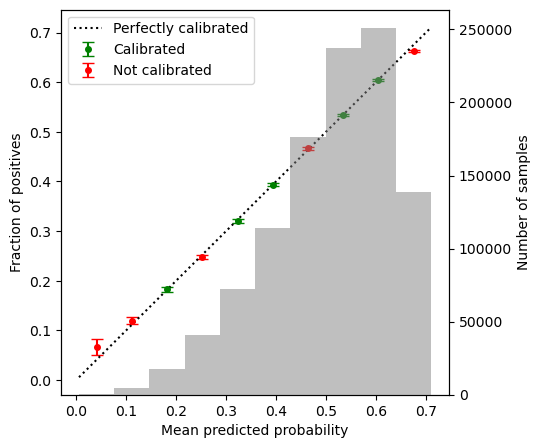

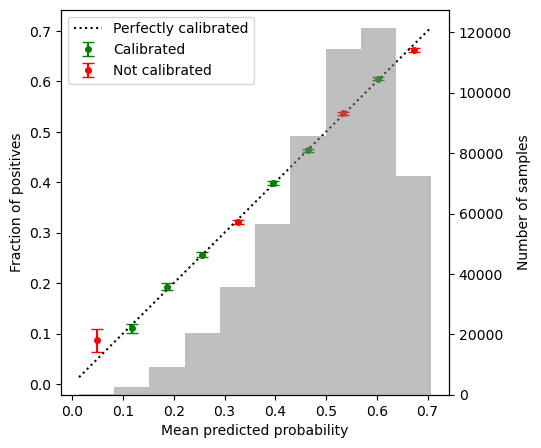

In [64]:
calibration_plot(np.average(probs_4b_est_train, axis=0, weights=weights), events_train.is_4b, sample_weights=events_train.weights, bins=nbins)
plt.show()

calibration_plot(np.average(probs_4b_est_test, axis=0, weights=weights), events_test.is_4b, sample_weights=events_test.weights, bins=nbins)
plt.show()

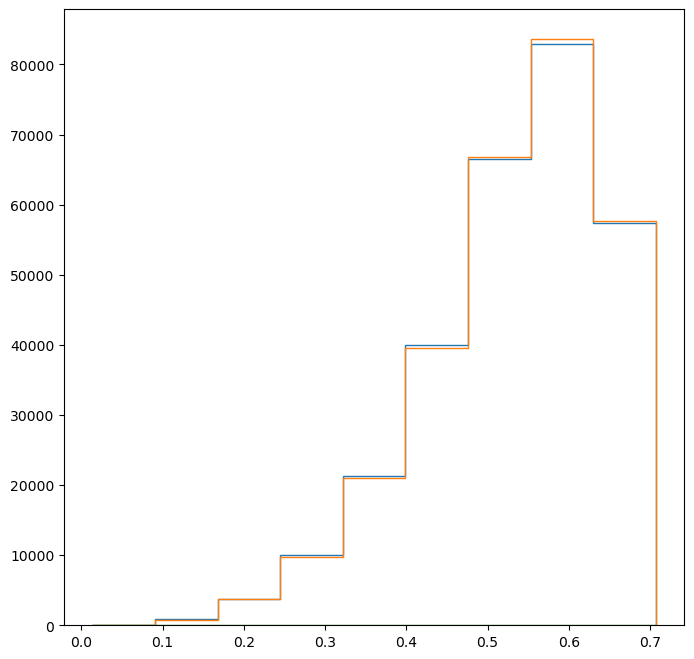

Sigmas:  [-1.64667808 -0.65553875 -2.12632034 -2.05178393 -1.99335341  1.32569799
  2.88247738  1.25973652]
Sigma avg:  1.8540118715703533
Degree of freedom:  8
Rejected:  True


In [66]:
hist_values = np.average(probs_4b_est_test, axis=0, weights=weights)

events_test_clone = events_test.clone()
events_test_clone.reweight(np.where(events_test_clone.is_4b, events_test_clone.weights, events_test_clone.weights * hist_values / (1 - hist_values)))
bins = np.linspace(np.min(hist_values), np.max(hist_values), nbins)
hist_4b, _ = np.histogram(hist_values[events_test_clone.is_4b], bins=bins, weights=events_test_clone.weights[events_test_clone.is_4b])
hist_3b, _ = np.histogram(hist_values[events_test_clone.is_3b], bins=bins, weights=events_test_clone.weights[events_test_clone.is_3b])

min_n_samples = 100
test_idx = (hist_4b > min_n_samples) & (hist_3b > min_n_samples)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
hist_events_by_labels(events_test_clone, hist_values, bins=bins, ax=ax)
plt.show()

sigma = (hist_4b - hist_3b) / np.sqrt((hist_4b + hist_3b) / 2)
sigma = sigma[test_idx]
sigma_avg = np.sqrt(np.mean(sigma**2))
df = np.sum(test_idx) 

print("Sigmas: ", sigma)
print("Sigma avg: ", sigma_avg)
print("Degree of freedom: ", df)
print("Rejected: ", df * sigma_avg**2 > stats.chi2.ppf(0.95, df))


In [67]:
np.sqrt(stats.chi2.ppf(0.95, df) / df)

1.3922694178869195

In [17]:
sigmas = (hist_4b - hist_3b) / np.sqrt((hist_4b + hist_3b) / 2)
np.sqrt(np.mean(sigmas**2))

2.7721918

In [100]:
def get_histogram_info(events, values, bins):
    assert len(events) == len(values)

    if isinstance(bins, int):
        bins = np.linspace(np.min(values), np.max(values), bins)
    
    hist_3b, _ = np.histogram(values[events.is_3b], bins=bins, weights=events.weights[events.is_3b])
    hist_bg4b, _ = np.histogram(values[events.is_bg4b], bins=bins, weights=events.weights[events.is_bg4b])
    hist_signal, _ = np.histogram(values[events.is_signal], bins=bins, weights=events.weights[events.is_signal])
    hist_4b, _ = np.histogram(values[events.is_4b], bins=bins, weights=events.weights[events.is_4b])

    std_est = np.sqrt((hist_3b + hist_4b) / 2)
    is_sampled = std_est > 0
    sigma = (hist_4b - hist_3b)[is_sampled]  / std_est[is_sampled]
    sigma_avg = np.sqrt(np.mean(sigma**2))
    sigma_bg4b = (hist_bg4b - hist_3b)[is_sampled] / std_est[is_sampled]
    sigma_avg_bg4b = np.sqrt(np.mean(sigma_bg4b**2))
    df = np.sum(is_sampled)

    return {
        "hist_3b": hist_3b,
        "hist_bg4b": hist_bg4b,
        "hist_signal": hist_signal,
        "hist_4b": hist_4b,
        "std_est": std_est,
        "sigma": sigma,
        "sigma_avg": sigma_avg,
        "sigma_bg4b": sigma_bg4b,
        "sigma_avg_bg4b": sigma_avg_bg4b,
        "df": df,
    }